In [70]:
import pandas as pd
import os as os
import numpy as np
# Creating empty list for broken tooth and healthy gearbox datasets
broken = []
healthy = []

# Defining the path where the datasets are stored
pth1 = 'dataset/BrokenTooth'
pth2 = 'dataset/Healthy'

# Reading the dataset as the list items using the OS library to access the files and read_csv function from pandas to read the daatasets 
# **Reading each file in the BrokenTooth and Healthy directories and appending it to the respective lists as pandas' DataFrame object (abbr.: df)
for file_name in os.listdir(pth1):
    this_df = pd.read_csv(os.path.join(pth1, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 0
    broken.append(this_df)

for file_name in os.listdir(pth2):
    this_df = pd.read_csv(os.path.join(pth2, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 1
    healthy.append(this_df)

print(broken[0])

              a1        a2        a3        a4  load  gearbox_status
0       1.260410 -1.357260 -1.916330  1.845700    10               0
1      -0.126204 -2.272830  0.536155  1.530920    10               0
2      -0.903164 -1.042040 -0.741337  1.650110    10               0
3      -1.693560  2.792950 -0.066998  2.017350    10               0
4      -3.556980  2.114110  0.225473  2.329820    10               0
...          ...       ...       ...       ...   ...             ...
111611 -2.650120 -0.908847 -1.379540  6.474160    10               0
111612 -3.455030  4.149470  0.059362  5.129880    10               0
111613  0.138851  3.311860  0.264506 -0.847989    10               0
111614 -5.326050 -0.911559  0.435160 -2.168490    10               0
111615 -5.691600 -2.190750  0.029839 -0.027178    10               0

[111616 rows x 6 columns]


In [71]:
# Aggregating dataset based on health status
broken_agg = broken[0]
healthy_agg = healthy[0]
for i in range(1,10):
    broken_agg = pd.concat([broken_agg, broken[i]], ignore_index=True)
    healthy_agg = pd.concat([healthy_agg, healthy[i]], ignore_index=True)

print(broken[0])

              a1        a2        a3        a4  load  gearbox_status
0       1.260410 -1.357260 -1.916330  1.845700    10               0
1      -0.126204 -2.272830  0.536155  1.530920    10               0
2      -0.903164 -1.042040 -0.741337  1.650110    10               0
3      -1.693560  2.792950 -0.066998  2.017350    10               0
4      -3.556980  2.114110  0.225473  2.329820    10               0
...          ...       ...       ...       ...   ...             ...
111611 -2.650120 -0.908847 -1.379540  6.474160    10               0
111612 -3.455030  4.149470  0.059362  5.129880    10               0
111613  0.138851  3.311860  0.264506 -0.847989    10               0
111614 -5.326050 -0.911559  0.435160 -2.168490    10               0
111615 -5.691600 -2.190750  0.029839 -0.027178    10               0

[111616 rows x 6 columns]


In [88]:
import math

def divide_into(df, n):
    group_size = n
    df_groups = []
    for i in range(math.ceil(df['a1'].count()/group_size)):
        this_df = df.iloc[i*group_size:(i+1)*group_size, :]
        # this_df['load'] = df['load']
        # this_df['gearbox_status'] = df['gearbox_status']
        df_groups.append(this_df)
        
    return pd.DataFrame(map(pd.DataFrame.std, df_groups))


In [89]:
broken_stdev = []
for i in range(0,10):
    broken_stdev.append(divide_into(broken[i], 100))
broken_stdev[0].describe()

,a1,a2,a3,a4,load,gearbox_status
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.0,1117.0
mean,3.538532,3.854153,3.079140,3.235441,0.0,0.0
std,0.927966,1.039527,0.811480,0.898048,0.0,0.0
min,1.519307,1.341292,0.990336,1.266873,0.0,0.0
25%,2.838658,3.094107,2.567616,2.596823,0.0,0.0
50%,3.440931,3.773006,3.061200,3.215536,0.0,0.0
75%,4.184417,4.514980,3.571182,3.831201,0.0,0.0
max,6.728683,7.859704,5.851548,6.503544,0.0,0.0


In [90]:
healthy_stdev = []
for i in range(0,10):
    healthy_stdev.append(divide_into(healthy[i], 100))
healthy_stdev[0]

,a1,a2,a3,a4,load,gearbox_status
0,8.809606,6.797120,4.815198,5.971550,0.0,0.0
1,8.143851,4.210509,4.137510,5.496099,0.0,0.0
2,6.601136,3.000749,3.608767,5.517379,0.0,0.0
3,9.582499,4.519286,5.679526,5.656378,0.0,0.0
4,10.201630,5.965807,6.589977,6.500685,0.0,0.0
...,...,...,...,...,...,...
1009,9.844470,4.370987,5.254200,5.599210,0.0,0.0
1010,6.056313,4.141105,3.845646,5.137307,0.0,0.0
1011,7.510356,4.243818,5.381351,5.542929,0.0,0.0
1012,4.063881,3.056092,2.598164,2.683162,0.0,0.0


In [80]:
dataset = pd.concat([healthy_stdev[0], broken_stdev[0]], axis=0)
dataset.describe()

,a1,a2,a3,a4
count,2131.000000,2131.000000,2131.000000,2131.000000
mean,5.650914,4.165668,3.767001,4.086204
std,2.662306,1.100169,1.120914,1.317695
min,1.519307,1.341292,0.990336,1.266873
25%,3.402497,3.448920,2.956976,3.101993
50%,4.985057,4.071910,3.683986,3.979254
75%,7.629193,4.766559,4.528482,5.031311
max,15.776174,9.692683,7.495185,9.418170


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Library/Frameworks/Python.framework/Versio

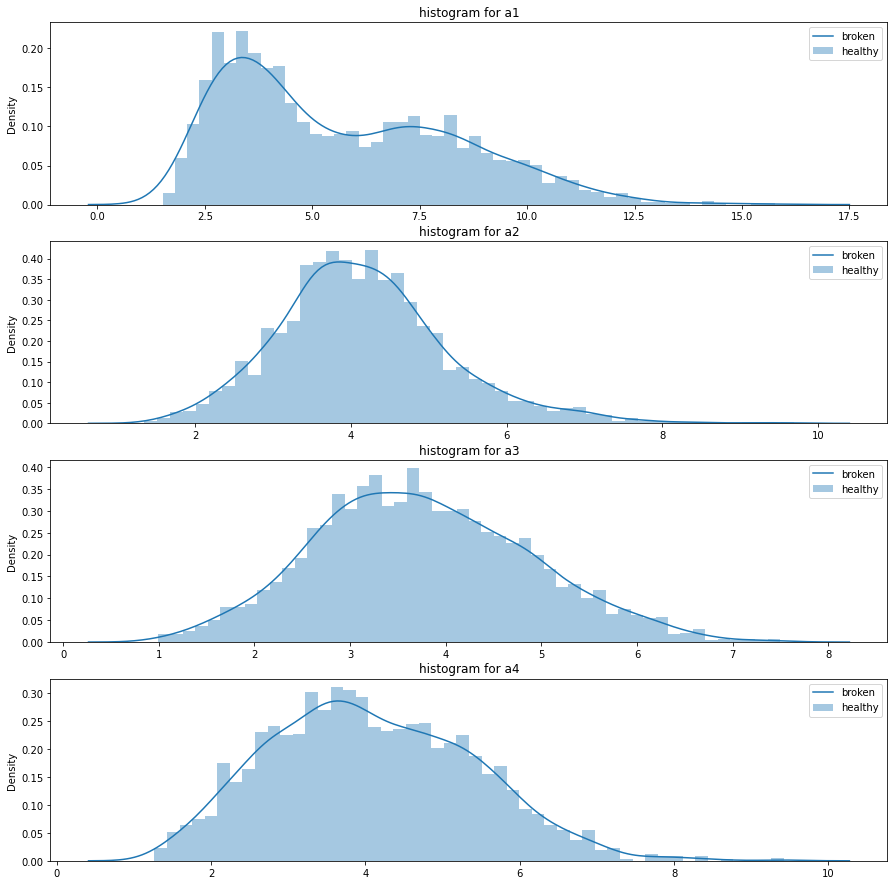

In [76]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

plt.figure(figsize=(15,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.gearbox_status == 0], bins=50)
    sns.distplot(dataset[cn][dataset.gearbox_status == 1], bins=50)
    ax.set_xlabel('')
    plt.legend(['broken', 'healthy'])
    ax.set_title('histogram for ' + str(cn))
plt.show()